In [53]:
import numpy as np
import matplotlib.pyplot as plt
import Pk_library as PKL
from matplotlib.lines import Line2D
import cube
import plotPS as pps 
from figure import CustomFigure

In [54]:
boxsize = 5120 #Mpc
ngrid = 256 #px
resolution = boxsize/ngrid #Mpc/px
k_nyquist = np.pi / resolution 
k_boxsize = 2*np.pi/boxsize

kmax = np.sqrt(3)*k_nyquist
kmin = k_boxsize/2

datapath = "/mn/stornext/d10/data/johanmkr/simulations/gevolution_first_runs/"
seed = 1234
gr_v_path = datapath + f"seed{seed:04d}/gr/gr_snap005_phi.h5"
newton_v_path = datapath + f"seed{seed:04d}/newton/newton_snap005_phi.h5"
gr_cube = cube.Cube(gr_v_path)
newton_cube = cube.Cube(newton_v_path)

In [55]:
# Bispectra analysis

k1 = 6e-3 #h/Mpc
k2 = 5e-3 #h/Mpc
MAS = "CIC" 
threads = 32
theta = np.linspace(np.pi/2, np.pi,75) 
gr_data = gr_cube.data.astype(np.float32)
newton_data = newton_cube.data.astype(np.float32)

# Compute spectra
grBBk = PKL.Bk(gr_data, boxsize, k1, k2, theta, MAS, threads)
newBBk = PKL.Bk(newton_data, boxsize, k1, k2, theta, MAS, threads)

# Quantities
gBk = grBBk.B # Bispectrum
gQk = grBBk.Q # Reduced bispectrum
gPk = grBBk.Pk # Power spectrum
gk = grBBk.k # k modes

nBk = newBBk.B # Bispectrum
nQk = newBBk.Q # Reduced bispectrum
nPk = newBBk.Pk # Power spectrum
nk = newBBk.k # k modes



Computing bispectrum of the field...
Time to compute bispectrum = 13.44

Computing bispectrum of the field...
Time to compute bispectrum = 13.50


Text(0, 0.5, '$B(k,k,k)$')

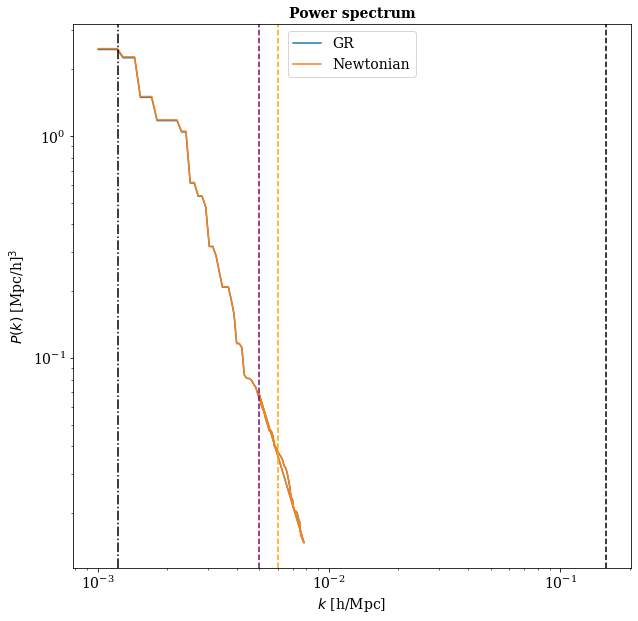

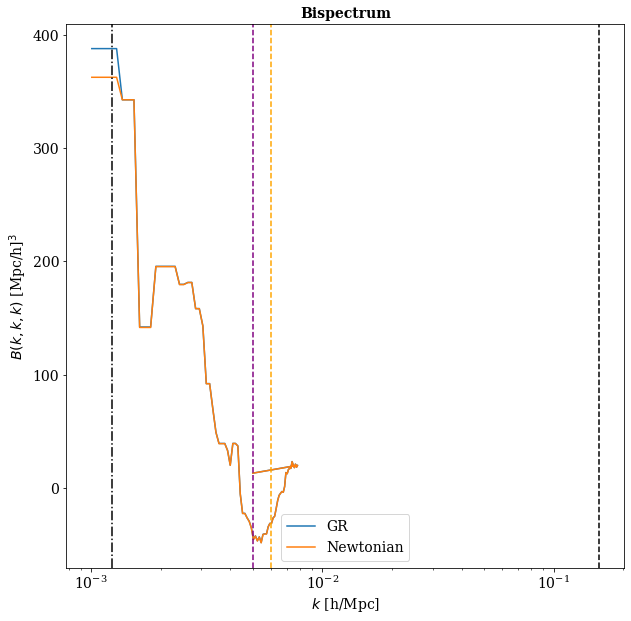

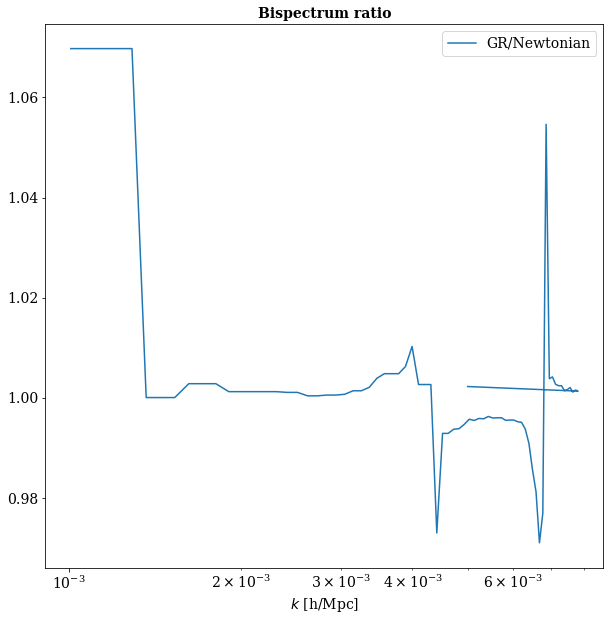

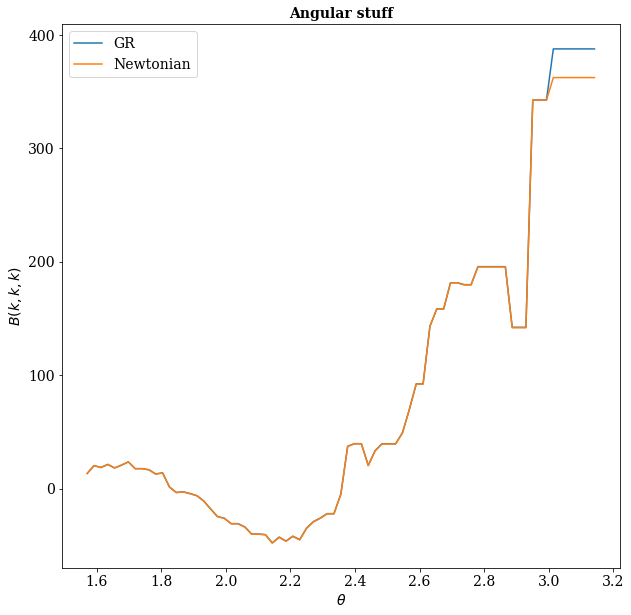

In [56]:

# Power spectrum
fig, ax = plt.subplots(figsize=(10,10))
ax.loglog(gk[1:-1], gPk[1:-1], label="GR")
ax.loglog(nk[1:-1], nPk[1:-1], label="Newtonian")
ax.legend()
ax.set_title("Power spectrum")
ax.set_xlabel(r"$k$ [h/Mpc]")
ax.set_ylabel(r"$P(k)$ [Mpc/h]$^3$")
ax.axvline(k1, color="orange", linestyle="--")
ax.axvline(k2, color="purple", linestyle="--")
ax.axvline(k_nyquist, color="black", linestyle="--")
ax.axvline(k_boxsize, color="black", linestyle="-.")

# Bispectrum
fig, ax = plt.subplots(figsize=(10,10))
ax.semilogx(gk[1:-1], gBk, label="GR")
ax.semilogx(nk[1:-1], nBk, label="Newtonian")
ax.legend()
ax.set_title("Bispectrum")
ax.set_xlabel(r"$k$ [h/Mpc]")
ax.set_ylabel(r"$B(k,k,k)$ [Mpc/h]$^3$")
ax.axvline(k1, color="orange", linestyle="--")
ax.axvline(k2, color="purple", linestyle="--")
ax.axvline(k_nyquist, color="black", linestyle="--")
ax.axvline(k_boxsize, color="black", linestyle="-.")

# Ratio
fig, ax = plt.subplots(figsize=(10,10))
ratio = gBk/nBk
ax.semilogx(gk[1:-1], ratio, label="GR/Newtonian")
ax.legend()
ax.set_title("Bispectrum ratio")
ax.set_xlabel(r"$k$ [h/Mpc]")

# Angular stuff
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(theta, gBk, label="GR")
ax.plot(theta, nBk, label="Newtonian")
ax.legend()
ax.set_title("Angular stuff")
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$B(k,k,k)$")


In [57]:
# Bispectra analysis

k1 = 1e-2 #h/Mpc
k2 = 1e-2 #h/Mpc
MAS = "CIC" 
threads = 32
theta = np.linspace(np.pi/2, np.pi,75) 
gr_data = gr_cube.data.astype(np.float32)
newton_data = newton_cube.data.astype(np.float32)

# Compute spectra
grBBk = PKL.Bk(gr_data, boxsize, k1, k2, theta, MAS, threads)
newBBk = PKL.Bk(newton_data, boxsize, k1, k2, theta, MAS, threads)

# Quantities
gBk = grBBk.B # Bispectrum
gQk = grBBk.Q # Reduced bispectrum
gPk = grBBk.Pk # Power spectrum
gk = grBBk.k # k modes

nBk = newBBk.B # Bispectrum
nQk = newBBk.Q # Reduced bispectrum
nPk = newBBk.Pk # Power spectrum
nk = newBBk.k # k modes


Computing bispectrum of the field...
Time to compute bispectrum = 13.33

Computing bispectrum of the field...
Time to compute bispectrum = 13.20


Text(0, 0.5, '$B(k,k,k)$')

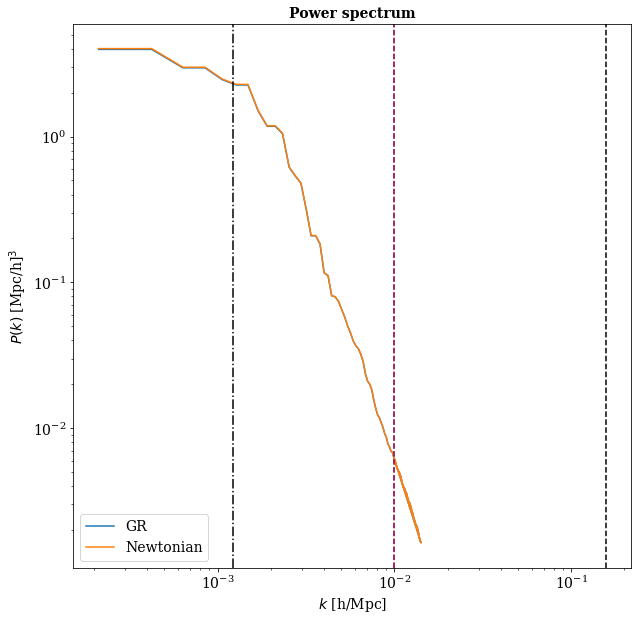

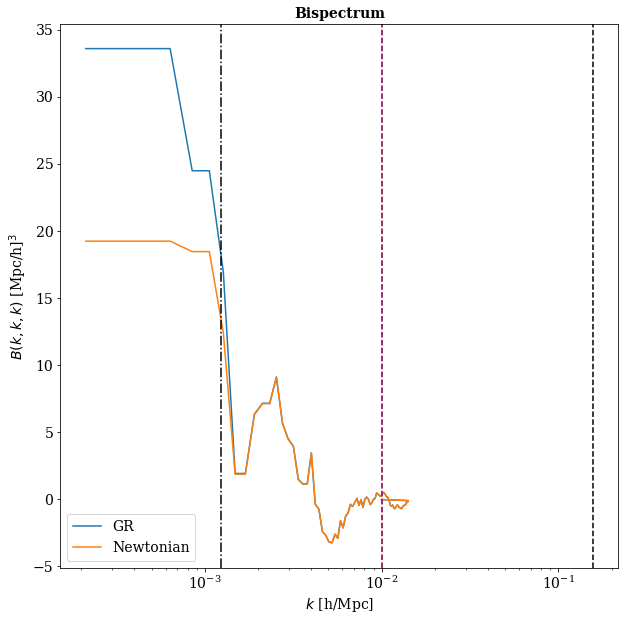

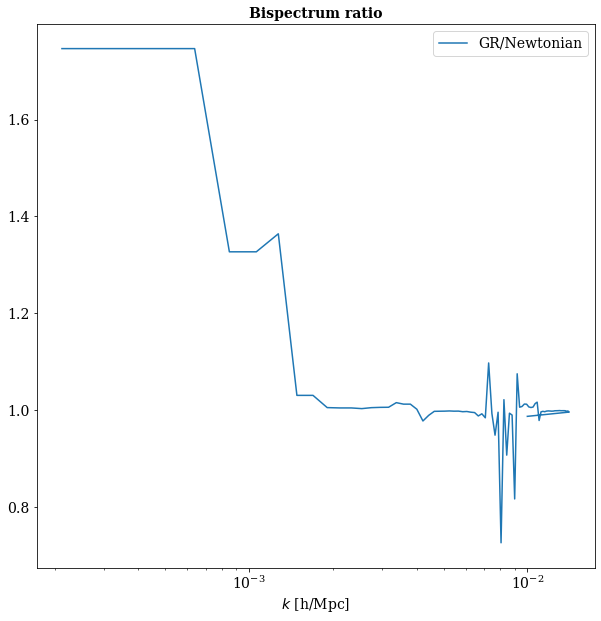

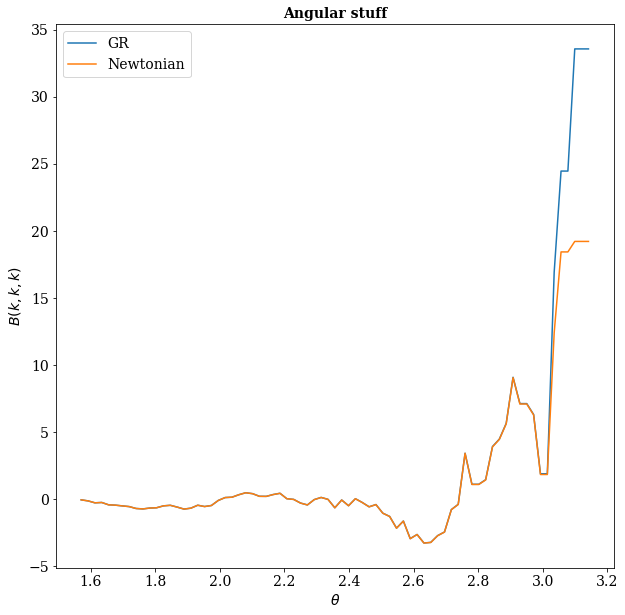

In [58]:
# Power spectrum
fig, ax = plt.subplots(figsize=(10,10))
ax.loglog(gk[1:-1], gPk[1:-1], label="GR")
ax.loglog(nk[1:-1], nPk[1:-1], label="Newtonian")
ax.legend()
ax.set_title("Power spectrum")
ax.set_xlabel(r"$k$ [h/Mpc]")
ax.set_ylabel(r"$P(k)$ [Mpc/h]$^3$")
ax.axvline(k1, color="orange", linestyle="--")
ax.axvline(k2, color="purple", linestyle="--")
ax.axvline(k_nyquist, color="black", linestyle="--")
ax.axvline(k_boxsize, color="black", linestyle="-.")

# Bispectrum
fig, ax = plt.subplots(figsize=(10,10))
ax.semilogx(gk[1:-1], gBk, label="GR")
ax.semilogx(nk[1:-1], nBk, label="Newtonian")
ax.legend()
ax.set_title("Bispectrum")
ax.set_xlabel(r"$k$ [h/Mpc]")
ax.set_ylabel(r"$B(k,k,k)$ [Mpc/h]$^3$")
ax.axvline(k1, color="orange", linestyle="--")
ax.axvline(k2, color="purple", linestyle="--")
ax.axvline(k_nyquist, color="black", linestyle="--")
ax.axvline(k_boxsize, color="black", linestyle="-.")

# Ratio
fig, ax = plt.subplots(figsize=(10,10))
ratio = gBk/nBk
ax.semilogx(gk[1:-1], ratio, label="GR/Newtonian")
ax.legend()
ax.set_title("Bispectrum ratio")
ax.set_xlabel(r"$k$ [h/Mpc]")

# Angular stuff
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(theta, gBk, label="GR")
ax.plot(theta, nBk, label="Newtonian")
ax.legend()
ax.set_title("Angular stuff")
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$B(k,k,k)$")

In [67]:
# Bispectra analysis

k1 = 5e-3 #h/Mpc
k2 = 5e-3 #h/Mpc
MAS = "CIC" 
threads = 32
theta = np.linspace(np.pi/2, np.pi,75) 
gr_data = gr_cube.data.astype(np.float32)
newton_data = newton_cube.data.astype(np.float32)

# Compute spectra
grBBk = PKL.Bk(gr_data, boxsize, k1, k2, theta, MAS, threads)
newBBk = PKL.Bk(newton_data, boxsize, k1, k2, theta, MAS, threads)

# Quantities
gBk = grBBk.B # Bispectrum
gQk = grBBk.Q # Reduced bispectrum
gPk = grBBk.Pk # Power spectrum
gk = grBBk.k # k modes

nBk = newBBk.B # Bispectrum
nQk = newBBk.Q # Reduced bispectrum
nPk = newBBk.Pk # Power spectrum
nk = newBBk.k # k modes


Computing bispectrum of the field...
Time to compute bispectrum = 13.35

Computing bispectrum of the field...
Time to compute bispectrum = 13.23


Text(0, 0.5, '$B(k,k,k)$')

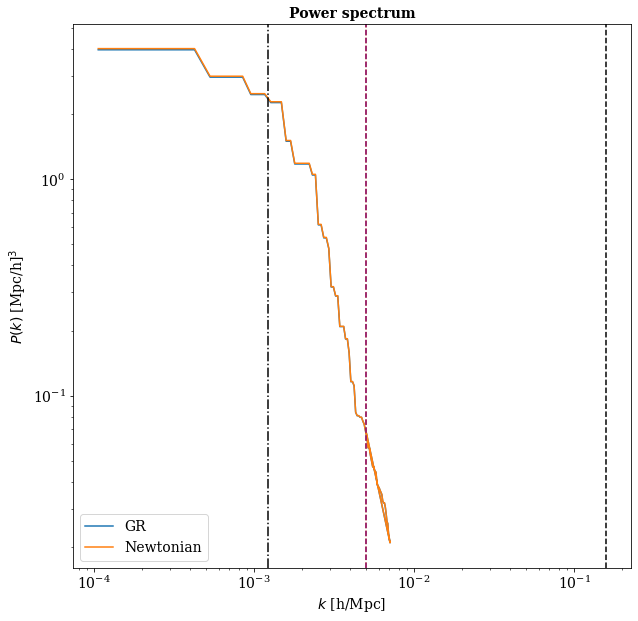

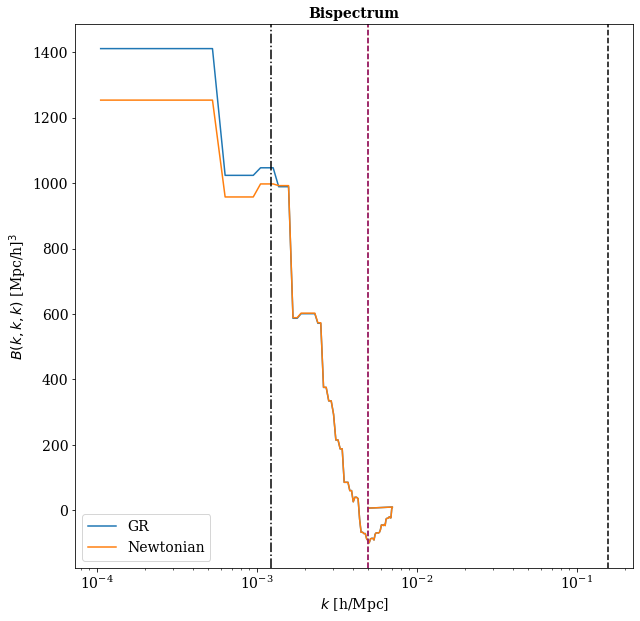

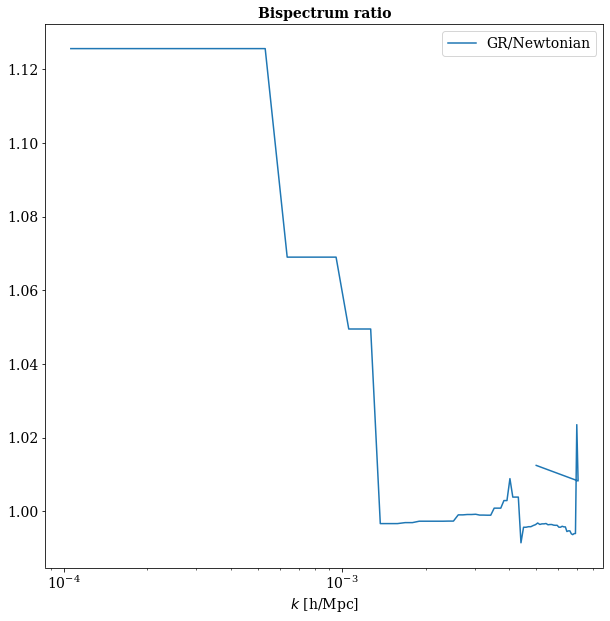

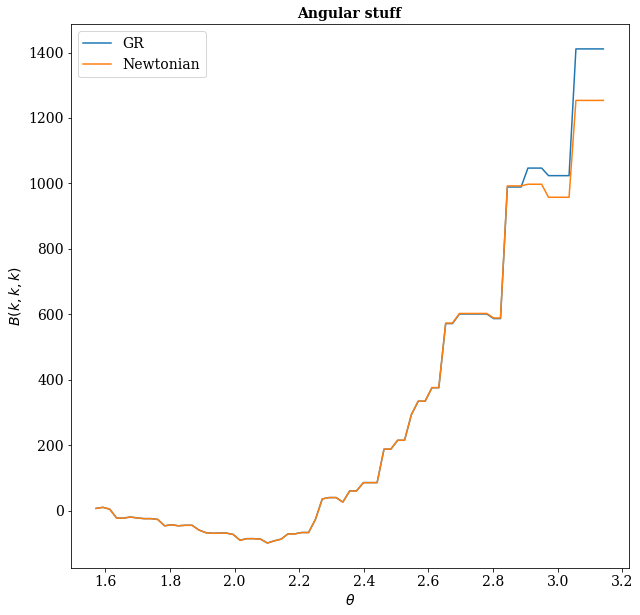

In [68]:
# Power spectrum
fig, ax = plt.subplots(figsize=(10,10))
ax.loglog(gk[1:-1], gPk[1:-1], label="GR")
ax.loglog(nk[1:-1], nPk[1:-1], label="Newtonian")
ax.legend()
ax.set_title("Power spectrum")
ax.set_xlabel(r"$k$ [h/Mpc]")
ax.set_ylabel(r"$P(k)$ [Mpc/h]$^3$")
ax.axvline(k1, color="orange", linestyle="--")
ax.axvline(k2, color="purple", linestyle="--")
ax.axvline(k_nyquist, color="black", linestyle="--")
ax.axvline(k_boxsize, color="black", linestyle="-.")

# Bispectrum
fig, ax = plt.subplots(figsize=(10,10))
ax.semilogx(gk[1:-1], gBk, label="GR")
ax.semilogx(nk[1:-1], nBk, label="Newtonian")
ax.legend()
ax.set_title("Bispectrum")
ax.set_xlabel(r"$k$ [h/Mpc]")
ax.set_ylabel(r"$B(k,k,k)$ [Mpc/h]$^3$")
ax.axvline(k1, color="orange", linestyle="--")
ax.axvline(k2, color="purple", linestyle="--")
ax.axvline(k_nyquist, color="black", linestyle="--")
ax.axvline(k_boxsize, color="black", linestyle="-.")

# Ratio
fig, ax = plt.subplots(figsize=(10,10))
ratio = gBk/nBk
ax.semilogx(gk[1:-1], ratio, label="GR/Newtonian")
ax.legend()
ax.set_title("Bispectrum ratio")
ax.set_xlabel(r"$k$ [h/Mpc]")

# Angular stuff
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(theta, gBk, label="GR")
ax.plot(theta, nBk, label="Newtonian")
ax.legend()
ax.set_title("Angular stuff")
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$B(k,k,k)$")